# set up 

In [232]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
np.set_printoptions(suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [233]:
customer_bank = pd.read_csv('Dataset_Customer-Churn-Records.csv')
cb = customer_bank.copy()

In [234]:
cb.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,5,GOLD,425


link: https://www.kaggle.com/datasets/radheshyamkollipara/bank-customer-churn <br>
reference: https://www.kaggle.com/code/zeferinoibarraborja/bank-churn-ensemblemodels-and-deeplearning

| 1  | RowNumber          | corresponds to the record (row) number and has no effect on the output.                                                                                                  |
|----|--------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 2  | CustomerId         | contains random values and has no effect on customer leaving the bank.                                                                                                   |
| 3  | Surname            | the surname of a customer has no impact on their decision to leave the bank.                                                                                             |
| 4  | CreditScore        | can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.                                                      |
| 5  | Geography          | a customer’s location can affect their decision to leave the bank.                                                                                                       |
| 6  | Gender             | it’s interesting to explore whether gender plays a role in a customer leaving the bank.                                                                                  |
| 7  | Age                | this is certainly relevant, since older customers are less likely to leave their bank than younger ones.                                                                 |
| 8  | Tenure             | refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.                   |
| 9  | Balance            | also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances. |
| 10 | NumOfProducts      | refers to the number of products that a customer has purchased through the bank.                                                                                         |
| 11 | HasCrCard          | denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.                    |
| 12 | IsActiveMember     | active customers are less likely to leave the bank.                                                                                                                      |
| 13 | EstimatedSalary    | as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.                                                    |
| 14 | Exited             | whether or not the customer left the bank.                                                                                                                               |
| 15 | Complain           | customer has complaint or not.                                                                                                                                           |
| 16 | Satisfaction Score | Score provided by the customer for their complaint resolution.                                                                                                           |
| 17 | Card Type          | type of card hold by the customer.                                                                                                                                       |
| 18 | Points Earned      | the points earned by the customer for using credit card.                                                                                                                 |

Acknowledgements

As we know, it is much more expensive to sign in a new client than keeping an existing one.

It is advantageous for banks to know what leads a client towards the decision to leave the company.

Churn prevention allows companies to develop loyalty programs and retention campaigns to keep as many customers as possible.

# cleaning

## overal

In [235]:
cb.info()

# no null value 
# dataset has 17 columns and 10.000 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [236]:
cb.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0,0,5,GOLD,425


In [237]:
cb[['Complain', 'Exited']]

,Complain,Exited
0,1,1
1,1,0
2,1,1
3,0,0
4,0,0
...,...,...
9995,0,0
9996,0,0
9997,1,1
9998,1,1


In [238]:
# Drop unnescessary columns

del cb['RowNumber']

In [239]:
# organize dataset 

cb = cb[['CustomerId', 'Surname', 'Geography', 'Gender', 'Age',      # customer info
       'Balance', 'EstimatedSalary', 'NumOfProducts',  'Card Type', 'HasCrCard', 'CreditScore',
       'Tenure', 'Complain', 'Satisfaction Score', 'Point Earned', 'IsActiveMember', 'Exited'
       ]]

## duplicated

In [240]:
cb.duplicated().sum()

# there are no duplicated values in dataset 

0

In [241]:
# as check above there are no null values either.

## outliers

In [242]:
# seperate number columns 
cb_number = cb.select_dtypes('number')

In [243]:
n = 0
for i in cb_number:
    n += 1
    print(f'{n} : {i}')

1 : CustomerId
2 : Age
3 : Balance
4 : EstimatedSalary
5 : NumOfProducts
6 : HasCrCard
7 : CreditScore
8 : Tenure
9 : Complain
10 : Satisfaction Score
11 : Point Earned
12 : IsActiveMember
13 : Exited


In [244]:
cb_number = cb_number[['CreditScore','CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited','Complain','Satisfaction Score','Point Earned']]

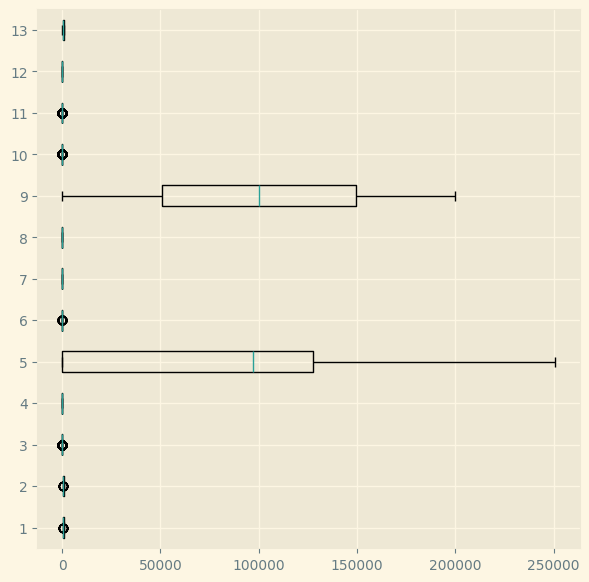

In [245]:
plt.figure(figsize = (7, 7))
plt.boxplot(cb_number, vert = False)

plt.show()

# there are no outliers

# brief EDA

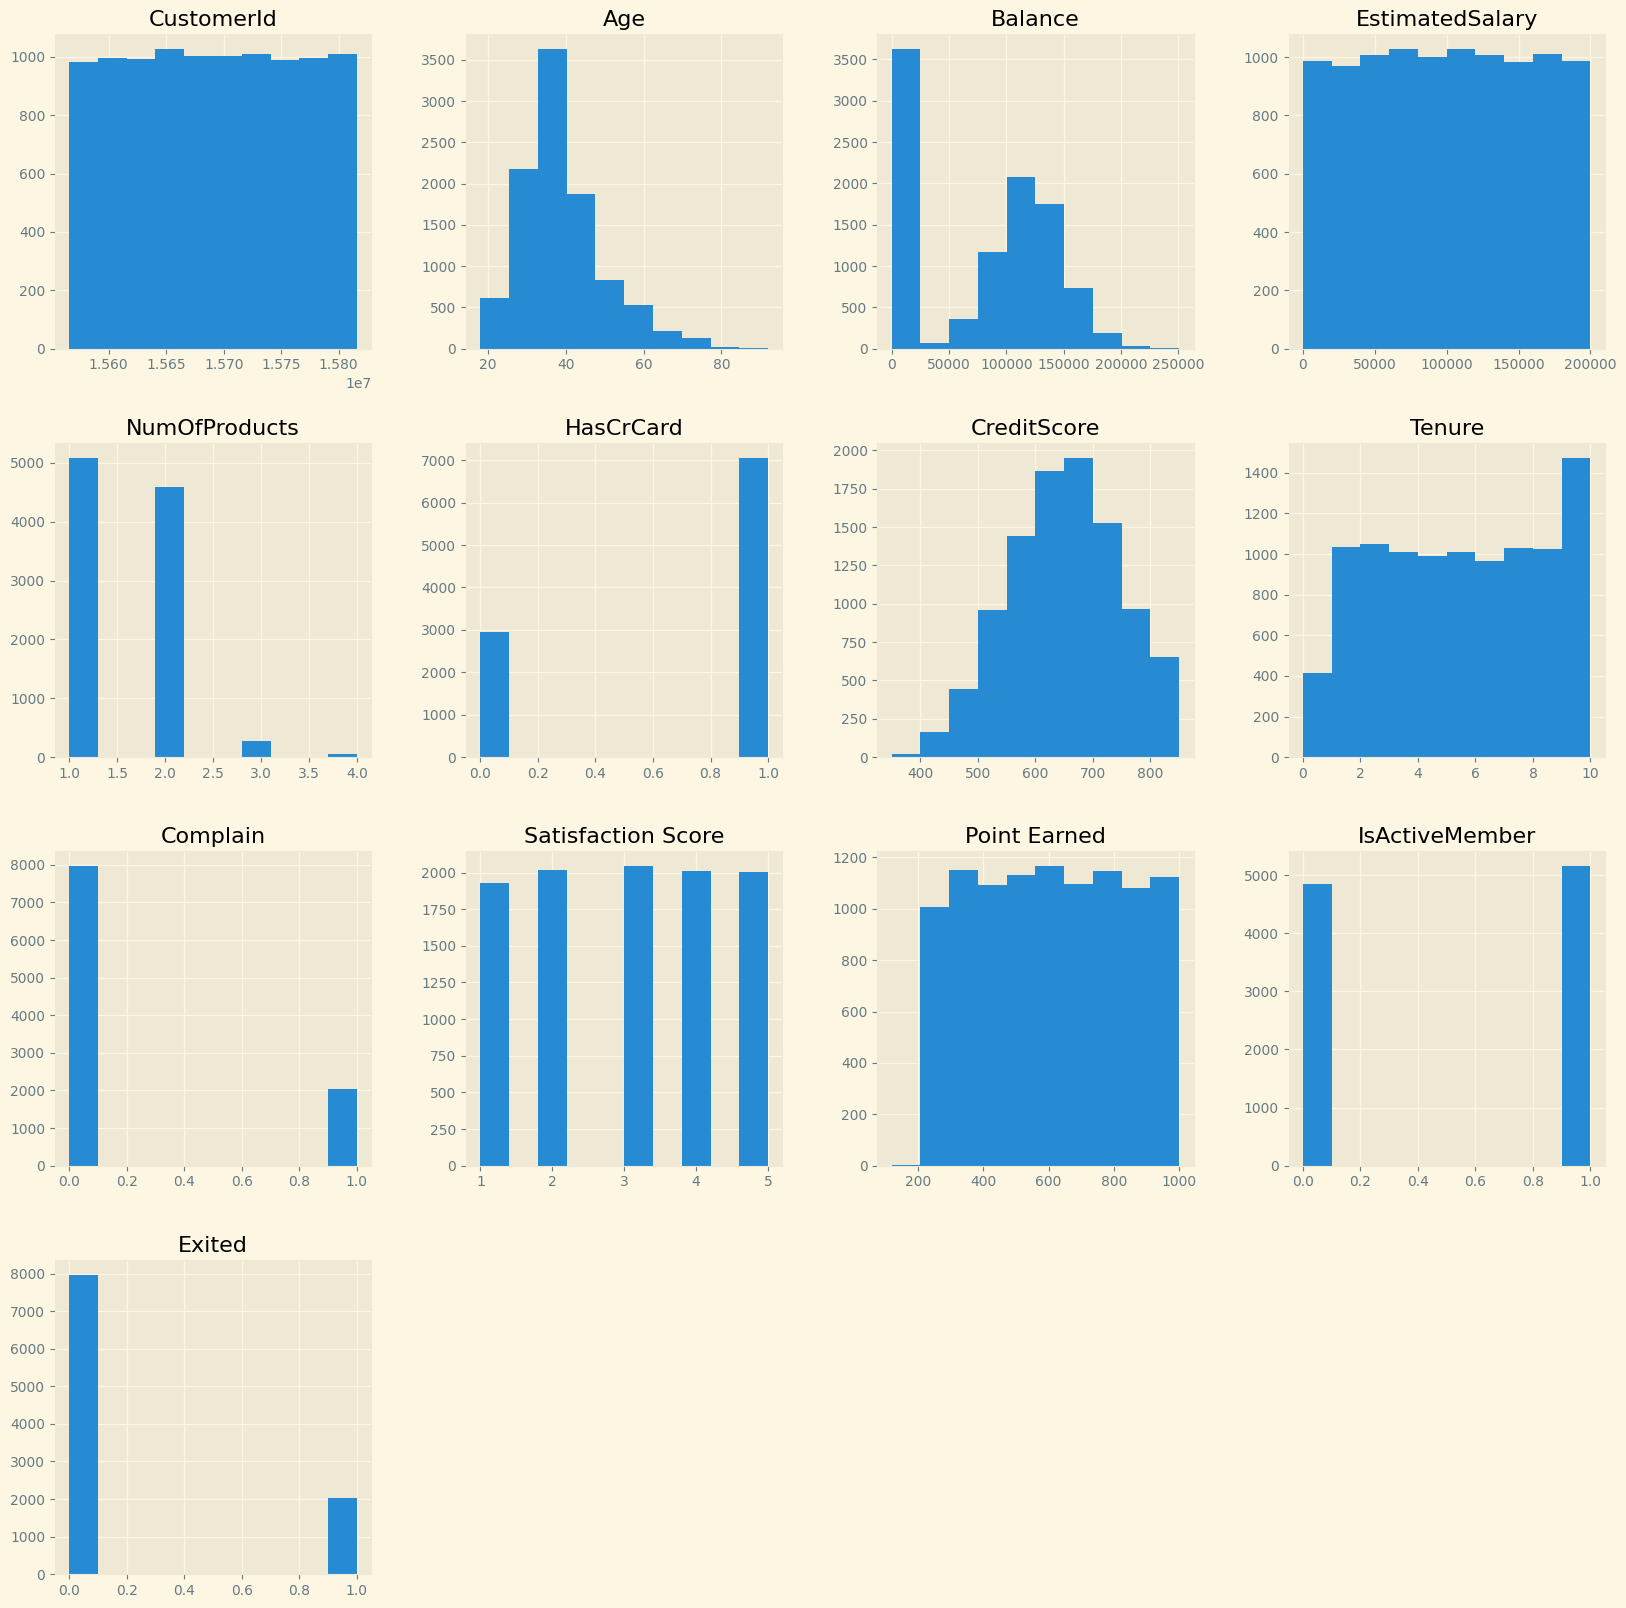

In [246]:
# basic graphs
cb.hist(figsize= (20,20))
plt.show()

## create column for better illustration

### creditScore

In [247]:
def credit_dict(score):
    if score > 800:
        return '800 - 900'
    elif score > 700:
        return '700 - 800'
    elif score > 600:
        return '600 - 700'
    elif score > 500:
        return '500 - 600'
    elif score > 400:
        return '400 - 500'
    elif score > 300:
        return '300 - 400'
    else:
        return 'Not in credits'

In [248]:
cb['Credit Rank'] = cb.CreditScore.apply(credit_dict)

### Age

In [249]:
def age_dict(age):
    if age > 50:
        return 'Senior'
    elif age >= 30:
        return 'Adult'
    elif age < 30:
        return 'Young_adult'
    else:
        return 'Not in Age'

cb['Age rank'] = cb.Age.apply(age_dict)

### Balance

In [250]:
def balance_dict(balance):
    if balance > 150000:
        return 'Balance high'
    elif balance >= 50000:
        return 'Balance medium'
    elif balance < 50000:
        return 'Balance small'
    else:
        return 'Not in Balance'

In [251]:
cb['Balance Rank'] = cb['Balance'].apply(balance_dict)

### HasCrCard

In [252]:
CrCard_dict = {1: 'Using Credit Card', 0: 'Not using Credit Card'}
cb.HasCrCard = cb.HasCrCard.map(CrCard_dict)
cb.HasCrCard.value_counts()

HasCrCard
Using Credit Card        7055
Not using Credit Card    2945
Name: count, dtype: int64

### Is Active member

In [253]:
IsActiveMember_dict = {1: 'Active', 0: 'Not active'}
cb['IsActiveMember_rank'] = cb.IsActiveMember.map(IsActiveMember_dict)
cb.IsActiveMember.value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

### Estimate Salary

In [254]:
# create columns salary rank
def salary_dict(salary):
    if salary > 150000:
        return '150k - 200k'
    elif salary > 100000:
        return '100k - 150k'
    elif salary > 50000:
        return '50k - 100k'
    elif salary > 0:
        return '0 - 50k'
    else:
        return 'Not in Salary'

cb['Salary Rank'] = cb.EstimatedSalary.apply(salary_dict)

### Exited

In [255]:
# Exited: Change booleans
Exited_dict = {0: 'Client', 1: 'Exited'}
cb['Exited_rank'] = cb.Exited.map(Exited_dict)
print(cb.Exited_rank.value_counts())
print(cb.Exited.value_counts())

Exited_rank
Client    7962
Exited    2038
Name: count, dtype: int64
Exited
0    7962
1    2038
Name: count, dtype: int64


### Complain

In [256]:
# Complain: Change booleans
Complain_dict = {0: 'No Complain', 1: 'Complain'}
cb['Complain_dict'] = cb.Complain.map(Complain_dict)
cb.Complain_dict.value_counts()

Complain_dict
No Complain    7956
Complain       2044
Name: count, dtype: int64

# Download dataset for illustrator

In [257]:
cb.to_csv('customer_churn_bank.csv', index=False)

# Model preparation

## encoding 

In [258]:
for i in cb.columns:
    print(i)
    print(cb[i].unique())
    print('---------')

# there are 3 columns need to encode

# 'Geography': 3 unique
# 'Gender' : 2 unique
# 'Card Type' : 4 unique


CustomerId
[15634602 15647311 15619304 ... 15584532 15682355 15628319]
---------
Surname
['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
---------
Geography
['France' 'Spain' 'Germany']
---------
Gender
['Female' 'Male']
---------
Age
[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
---------
Balance
[     0.    83807.86 159660.8  ...  57369.61  75075.31 130142.79]
---------
EstimatedSalary
[101348.88 112542.58 113931.57 ...  42085.58  92888.52  38190.78]
---------
NumOfProducts
[1 3 2 4]
---------
Card Type
['DIAMOND' 'GOLD' 'SILVER' 'PLATINUM']
---------
HasCrCard
['Using Credit Card' 'Not using Credit Card']
---------
CreditScore
[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 77

In [259]:
# encode 3 columns have string unique:

dictionary_gender = {'Male' : 0, 'Female' : 1}
cb['Gender_encode'] = cb.Gender.map(dictionary_gender)

onehot_Geography = pd.get_dummies(cb['Geography'], prefix = 'Geography').astype(int)
onehot_Card_type = pd.get_dummies(cb['Card Type'], prefix = 'Card Type').astype(int)

In [260]:
cb.columns

Index(['CustomerId', 'Surname', 'Geography', 'Gender', 'Age', 'Balance',
       'EstimatedSalary', 'NumOfProducts', 'Card Type', 'HasCrCard',
       'CreditScore', 'Tenure', 'Complain', 'Satisfaction Score',
       'Point Earned', 'IsActiveMember', 'Exited', 'Credit Rank', 'Age rank',
       'Balance Rank', 'IsActiveMember_rank', 'Salary Rank', 'Exited_rank',
       'Complain_dict', 'Gender_encode'],
      dtype='object')

In [261]:
cb_encode = pd.concat([cb,                 # dataset
                       onehot_Geography,
                       onehot_Card_type], axis = 1)

In [262]:
cb_encode.shape

(10000, 32)

## X, Y defining

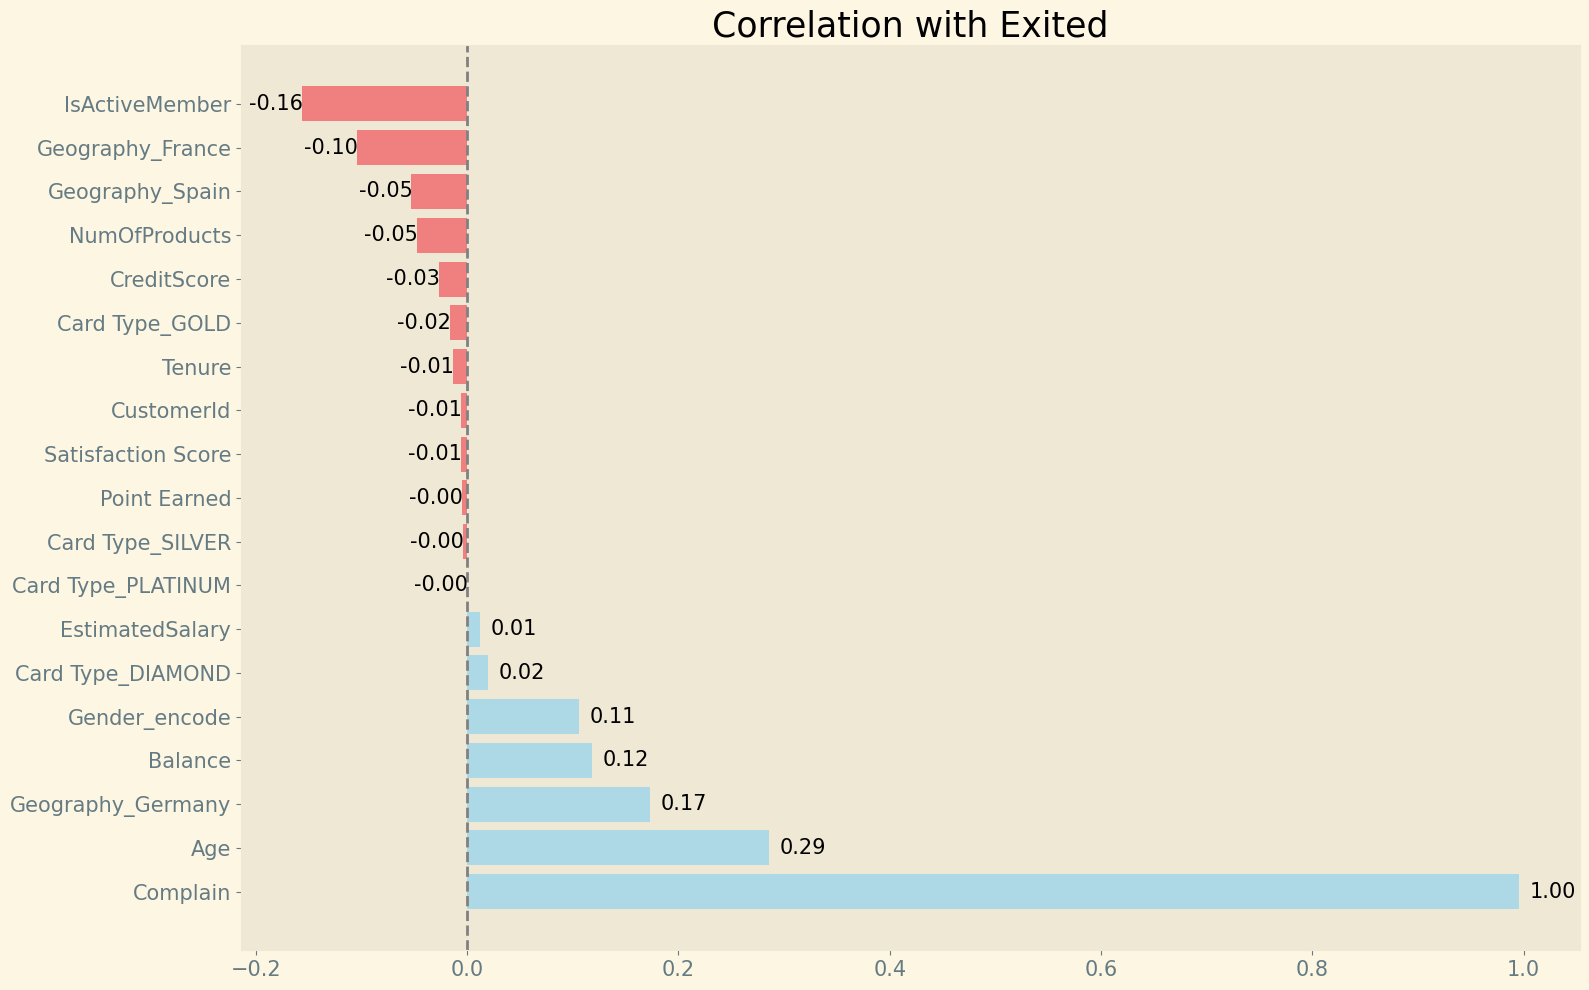

In [263]:
# calculate correlation of others columns to 'Exited'
cb_correlation = cb_encode.corr(numeric_only=True)[['Exited']]
cb_correlation.drop(index='Exited', inplace=True)
cb_correlation = cb_correlation.sort_values(by='Exited', ascending=False)

# plot chart
fig, ax = plt.subplots(figsize=(16, 10))

# draw a seperate linne at x = 0
ax.axvline(x=0, color='gray', linestyle='--')

# bar chart
colors = np.where(cb_correlation['Exited'] > 0, 'lightblue', 'lightcoral')
bars = ax.barh(cb_correlation.index, cb_correlation['Exited'], color=colors)

# rearrange value lable of bar chart
for bar in bars:
    width = bar.get_width()
    label_x_pos = width + 0.01 if width >= 0 else width - 0.05 # if value > 0 set in the right else set in the left
    ax.text(label_x_pos, bar.get_y() + bar.get_height() / 2, f'{width:.2f}', va='center', fontsize=15)

ax.set_xlabel('')
ax.set_title('Correlation with Exited', size=25)
plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

In [264]:
# sort columns have value outside of this range (-0.1, 0.1)
sorted(cb_correlation[~cb_correlation['Exited'].between(-0.1, 0.1)].index)

['Age',
 'Balance',
 'Complain',
 'Gender_encode',
 'Geography_France',
 'Geography_Germany',
 'IsActiveMember']

Column 'Conplain' has extreme correlation with 'Exited' columns. Delete 'Complain' column in model.

In [265]:
# create a dataset to check columns correlation to each other 
cb_encode_corr = cb_encode[['Exited',
                            'Age',
                            'Balance',
                            'Gender_encode',
                            'Geography_France',
                            'Geography_Germany',
                            'IsActiveMember']]

In [266]:
cb_encode_corr.shape

(10000, 7)

<Axes: >

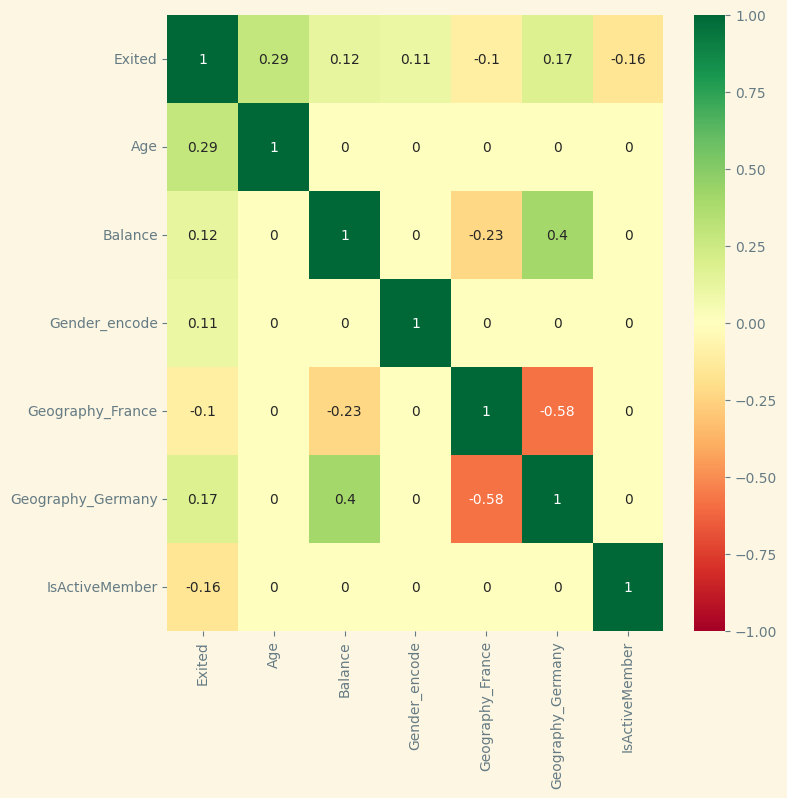

In [267]:
# create dataset correlation and only select the correlation out of the range (-0.1, 0.1)
def high_corr(value):
  if -0.1 < value < 0.1:
    return 0
  return value
cb_high_correlation = cb_encode_corr.corr(numeric_only=True)
cb_high_correlation = cb_high_correlation.applymap(high_corr)

# draw heatmap of correlation
plt.figure(figsize=(8,8))
sns.heatmap(cb_high_correlation, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

Columns 'Geography_France' and 'Geography_Germany' have high correlation

Chose to delete 'Geography_Germany' to prevent Multicollinearity.

In [268]:
cb_encode_corr = cb_encode[['Exited',
                           'Age',
                           'Balance',
                           'Gender_encode',
                           'Geography_France',
                           'Geography_Germany',
                           'IsActiveMember']]

In [269]:
cb_encode_corr

,Exited,Age,Balance,Gender_encode,Geography_France,Geography_Germany,IsActiveMember
0,1,42,0.000,1,1,0,1
1,0,41,83807.860,1,0,0,1
2,1,42,159660.800,1,1,0,0
3,0,39,0.000,1,1,0,0
4,0,43,125510.820,1,0,0,1
...,...,...,...,...,...,...,...
9995,0,39,0.000,0,1,0,0
9996,0,35,57369.610,0,1,0,1
9997,1,36,0.000,1,1,0,1
9998,1,42,75075.310,0,0,1,0


<Axes: >

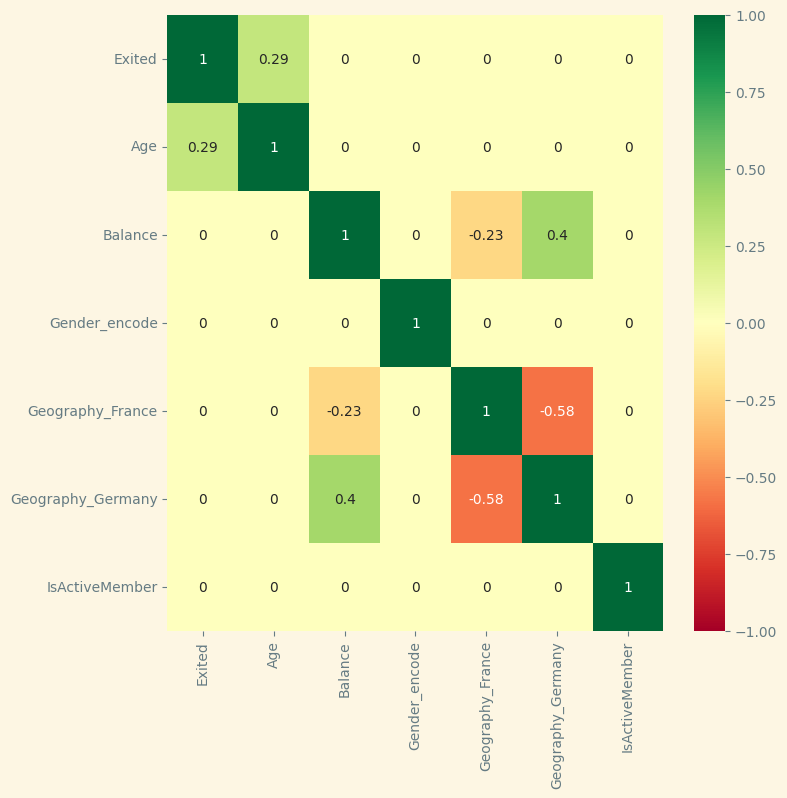

In [270]:
# create dataset correlation and only select the correlation out of the range (-0.1, 0.1)
def high_corr(value):
  if -0.2 < value < 0.2:
    return 0
  return value
cb_high_correlation = cb_encode_corr.corr(numeric_only=True)
cb_high_correlation = cb_high_correlation.applymap(high_corr)

# draw heatmap of correlation
plt.figure(figsize=(8,8))
sns.heatmap(cb_high_correlation, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)

In [271]:
# dataset after reducing and choosing high correlation 
cb_encode_corr.shape

(10000, 7)

## balance data

<Axes: >

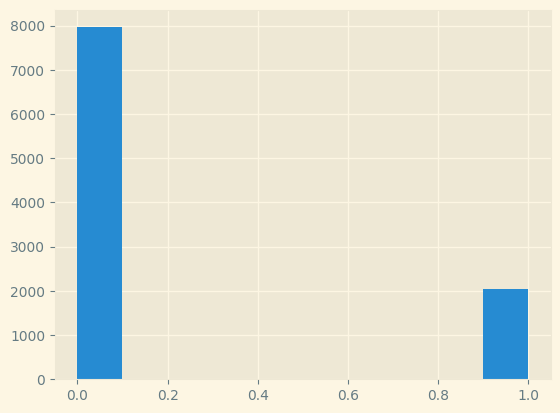

In [272]:
cb_encode_corr['Exited'].hist()

In [273]:
# dataset Clients == 0
cbc_0 = cb_encode_corr[cb_encode_corr.Exited == 0]

# dataset is Exited == 1
cbc_1 = cb_encode_corr[cb_encode_corr.Exited == 1]

# dataset size
cbc_0.shape, cbc_1.shape
# random choose data from cbc_0
cbc_0_resapled = cbc_0.sample(2038, random_state=1)

# new dataset
cbc_0_resapled.shape
# connect cb_0 and cbc_1
cb_balance = pd.concat([cbc_0_resapled,cbc_1]) 

# y after rebalance
cb_balance['Exited'].value_counts()

Exited
0    2038
1    2038
Name: count, dtype: int64

In [274]:
cb_balance.reset_index(drop=True, inplace=True)

# normalization: min-max scaler

In [275]:
# Scale X2
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(cb_balance.iloc[:, 1:11].values)

# create new dataframe
cbc = pd.DataFrame(data = X_scaled, columns = cb_balance.iloc[:, 1:11].columns)

# add y2 column
cbc['Exited'] = cb_balance['Exited']

cbc.head()

,Age,Balance,Gender_encode,Geography_France,Geography_Germany,IsActiveMember,Exited
0,0.200,0.000,1.000,1.000,0.000,1.000,0
1,0.286,0.000,0.000,1.000,0.000,0.000,0
2,0.157,0.000,0.000,0.000,0.000,0.000,0
3,0.257,0.445,0.000,0.000,0.000,1.000,0
4,0.371,0.456,1.000,1.000,0.000,1.000,0


# split train test dataset

In [276]:
# chose x, y 
y = cbc['Exited'].values
X = cbc[['Age', 'Balance', 'Gender_encode', 'Geography_France', 'Geography_Germany', 'IsActiveMember']].values

In [277]:
# create X_set for later use in model result
X_set = ['Age', 'Balance', 'Gender_encode', 'Geography_France', 'Geography_Germany', 'IsActiveMember']

In [278]:
# run split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [279]:
print(f'Data X_train: {X_train.sum()}')
print(f'Data y_train: {y_train.sum()}')
print(f'Data X_test: {X_test.sum()}')
print(f'Data y_test:{y_test.sum()}')

Data X_train: 6768.618920505589
Data y_train: 1438
Data X_test: 2882.1677445508994
Data y_test:600


# models

## Logistic Regression

### model set up

In [281]:
# import models
from sklearn.linear_model import LogisticRegression
model_logistic = LogisticRegression(random_state=1)
model_logistic.fit(X_train, y_train)

LogisticRegression(random_state=1)

### results

In [282]:
from sklearn.metrics import classification_report

# predict y
y_pred_logistic = model_logistic.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.73      0.72      0.72       623
           1       0.71      0.72      0.71       600

    accuracy                           0.72      1223
   macro avg       0.72      0.72      0.72      1223
weighted avg       0.72      0.72      0.72      1223



In [286]:
plt.style.use('default')

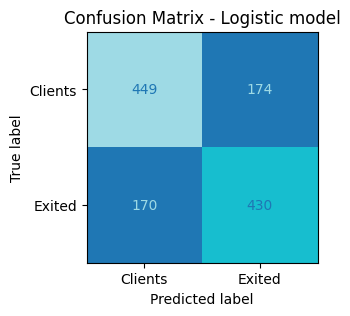

In [288]:
# matrix graph
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_logistic,
                                        display_labels=['Clients', 'Exited'],
                                        ax=ax, colorbar=False, cmap="tab20")
ax.set_title(f"Confusion Matrix - Logistic model")
plt.show()

### add on dictionary to compare models

In [140]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [141]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_logistic)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y1_proba_logistic = model_logistic.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y1_proba_logistic)
auc_score = roc_auc_score(y_test, y1_proba_logistic)

# class_report
report = classification_report(y_test, y_pred_logistic, output_dict=True)

In [142]:
# update dictionary to compare
model_results = {}
model_results['Logistic Regresson'] = {
  'Params': None,
  'TP': tp,
  'FN': fn,
  'TN': tn,
  'FP': fp,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
  'ROC AUC Score': auc_score,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
}

## Naive Bayes

### model set up

In [143]:
from sklearn.naive_bayes import GaussianNB
model_GNB = GaussianNB()
model_GNB.fit(X_train, y_train)

GaussianNB()

### results

In [144]:
# predict
y_pred_GNB = model_GNB.predict(X_test)

# classification report
print(classification_report(y_test, y_pred_GNB))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69       623
           1       0.68      0.67      0.67       600

    accuracy                           0.68      1223
   macro avg       0.68      0.68      0.68      1223
weighted avg       0.68      0.68      0.68      1223



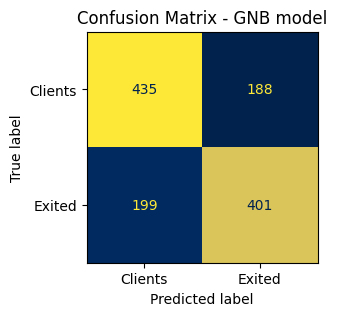

In [289]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_GNB,
                                        display_labels=['Clients', 'Exited'],
                                        ax=ax,
                                        colorbar=False,cmap="cividis")
ax.set_title(f"Confusion Matrix - GNB model")
plt.show()

### add dictionary

In [146]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_GNB)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_GNB = model_GNB.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_GNB)
auc_score = roc_auc_score(y_test, y_proba_GNB)

# class_report
report = classification_report(y_test, y_pred_GNB, output_dict=True)

In [147]:
# update dictionary to compare
model_results['GNB'] = {
  'Params': None,
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
  'ROC AUC Score': auc_score,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
}

## Decision Tree

### model set up

Mô hình có score cao nhất = 72.61% tại số tầng = [6]


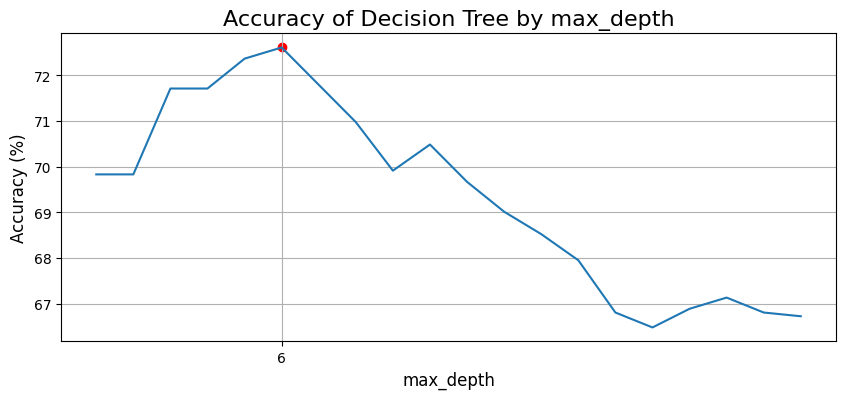

In [148]:
from sklearn import tree

tree_scores = []
for d in range(1, 21):
    model_tree = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    model_tree.fit(X_train, y_train)
    model_score = model_tree.score(X_test, y_test)
    tree_scores.append(model_score*100)

# Plot score
max_depth = [n for n in range(1, 21)]
max_n =     [n      for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]
max_score = [score  for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]
x_ticks =   [n      for n, score in zip(max_depth, tree_scores) if score == max(tree_scores)]

print(f"Mô hình có score cao nhất = {max_score[0]:.2f}% tại số tầng = {max_n}")

plt.figure(figsize=(10, 4))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(max_depth, tree_scores)
plt.ylabel('Accuracy (%)',fontsize=12)
plt.xlabel('max_depth',fontsize=12)
plt.xticks(x_ticks, size=10)
plt.title("Accuracy of Decision Tree by max_depth", size=16)
plt.grid()
plt.show()

In [149]:
model_tree = tree.DecisionTreeClassifier(max_depth=6, random_state=1)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=1)

### results

In [150]:
# predict
y_pred_tree = model_tree.predict(X_test)

# class_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.73      0.74      0.73       623
           1       0.73      0.71      0.72       600

    accuracy                           0.73      1223
   macro avg       0.73      0.73      0.73      1223
weighted avg       0.73      0.73      0.73      1223



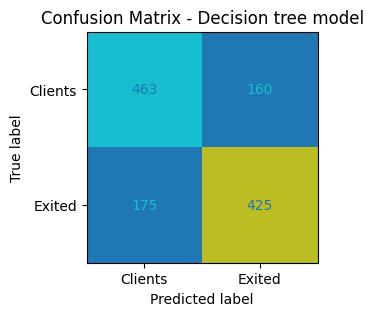

In [292]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_tree,
                                        display_labels=['Clients', 'Exited'],
                                        ax=ax,
                                        colorbar=False,
                                        cmap="tab10")
ax.set_title(f"Confusion Matrix - Decision tree model")
plt.show()

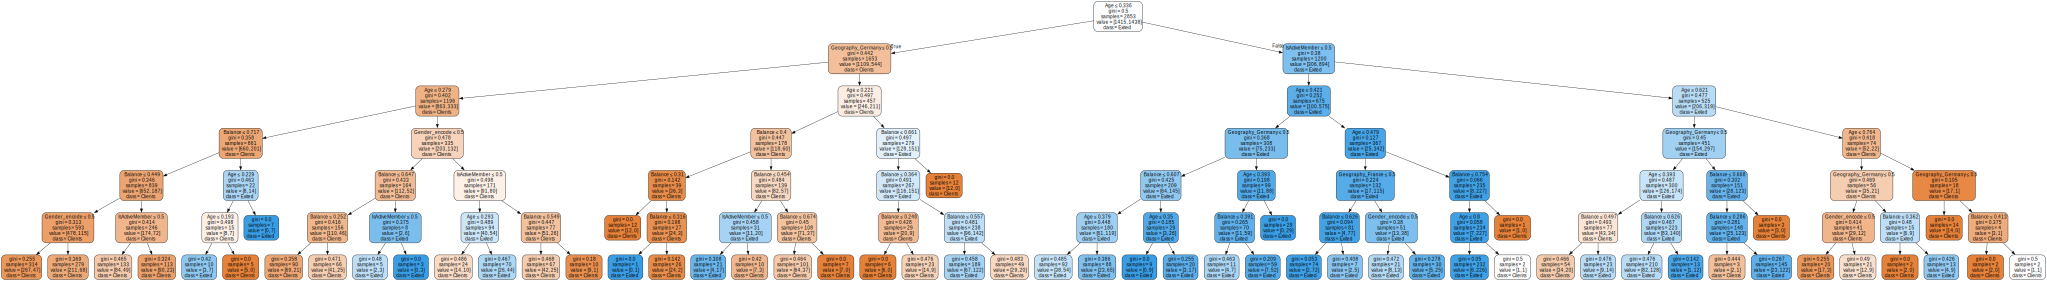

In [199]:
# tree graph
import graphviz
dot_data = tree.export_graphviz(
    model_tree,
    out_file= None,
    feature_names= X_set,
    class_names = ['Clients', 'Exited'],
    filled= True,
    rounded= True,
    special_characters= True
)
graph= graphviz.Source(dot_data)
graph

### add dictionary

In [153]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_tree)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_tree = model_tree.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_tree)
auc_score = roc_auc_score(y_test, y_proba_tree)

# class_report
report = classification_report(y_test, y_pred_tree, output_dict=True)

In [154]:
# update dictionary to compare
model_results['Decesion Tree'] = {
  'Params': 'max_depth = 1',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'ROC AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## Radom Forest

### model set up

Mô hình có score cao nhất = 0.69 tại số cây = [71]


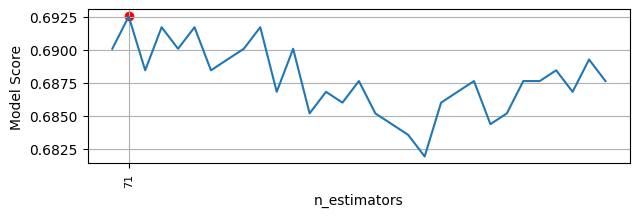

In [155]:
from sklearn.ensemble import RandomForestClassifier
rf_scores = []
for trees in range(70, 101):
    model_forest = RandomForestClassifier(n_estimators=trees, random_state = 1)
    model_forest.fit(X_train, y_train)
    model_score = model_forest.score(X_test, y_test)
    rf_scores.append(model_score)

# Plot score
n_estimators = [n for n in range(70, 101)]
max_n        = [n for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]
max_score    = [score for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]
x_ticks      = [n for n, score in zip(n_estimators, rf_scores) if score == max(rf_scores)]

print(f"Mô hình có score cao nhất = {max_score[0]:.2f} tại số cây = {max_n}")

plt.figure(figsize=(7, 2))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(n_estimators, rf_scores)
plt.xlabel('n_estimators')
plt.ylabel('Model Score')
plt.xticks(x_ticks, rotation=90, size=8)
plt.grid()
plt.show()

# n_estimators = 90

In [174]:
model_forest = RandomForestClassifier(n_estimators=71, random_state = 1)
model_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=71, random_state=1)

### results

In [175]:
# predict
y_pred_forest = model_forest.predict(X_test)

# class_report
print(classification_report(y_test, y_pred_forest, digits = 4))

              precision    recall  f1-score   support

           0     0.6976    0.6998    0.6987       623
           1     0.6873    0.6850    0.6861       600

    accuracy                         0.6926      1223
   macro avg     0.6924    0.6924    0.6924      1223
weighted avg     0.6925    0.6926    0.6925      1223



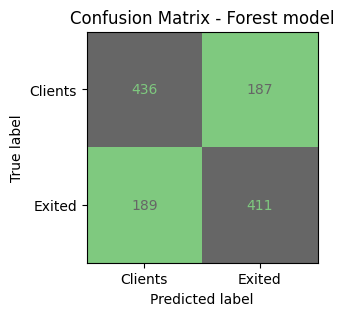

In [201]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
disp = ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_forest,
                                        display_labels=['Clients', 'Exited'],
                                        ax=ax,
                                        colorbar=False,
                                        cmap="Accent")
# disp.plot(values_format='')
ax.set_title(f"Confusion Matrix - Forest model")
plt.show()

### add dictionary

In [177]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_forest)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_forest = model_forest.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_forest)
auc_score = roc_auc_score(y_test, y_proba_forest)

# class_report
report = classification_report(y_test, y_pred_forest, output_dict=True)

In [178]:
# update dictionary to compare
model_results['Random forest'] = {
  'Params': 'n_estimators = 90',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'ROC AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

## K Nearst Neighbor

### model set up

Mô hình có score cao nhất = 0.74 tại số cây = [30]


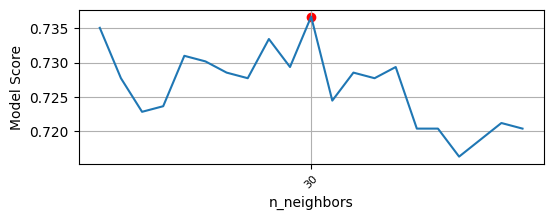

In [161]:
from sklearn.neighbors import KNeighborsClassifier
knn_scores = []
for k in range(20, 41):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    knn_scores.append(model_score)

# Plot score
n_neighbors = [k for k in range(20, 41)]
max_n =     [k      for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
max_score = [score  for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
x_ticks =   [k      for k, score in zip(n_neighbors, knn_scores) if score == max(knn_scores)]
print(f"Mô hình có score cao nhất = {max_score[0]:.2f} tại số cây = {max_n}")

plt.figure(figsize=(6, 2))
plt.scatter(max_n, max_score, color='red', marker = 'o')
plt.plot(n_neighbors, knn_scores)
plt.xlabel('n_neighbors')
plt.ylabel('Model Score')
plt.xticks(x_ticks, rotation=45, size=8)
plt.grid()
plt.show()

# n_neighbors = 34

### results

In [179]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=30)
model_KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [180]:
# predict
y_pred_KNN = model_KNN.predict(X_test)

# class_report
print(classification_report(y_test, y_pred_KNN, digits = 4))

              precision    recall  f1-score   support

           0     0.7250    0.7785    0.7508       623
           1     0.7509    0.6933    0.7210       600

    accuracy                         0.7367      1223
   macro avg     0.7379    0.7359    0.7359      1223
weighted avg     0.7377    0.7367    0.7362      1223



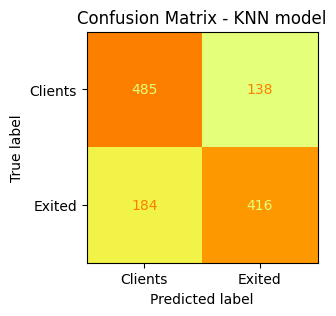

In [297]:
# graph
fig, ax = plt.subplots(figsize=(3, 3))
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_KNN,
                                        display_labels=['Clients', 'Exited'],
                                        ax=ax,
                                        colorbar=False,
                                        cmap="Wistia")
ax.set_title(f"Confusion Matrix - KNN model")
plt.show()

### add dictionary

In [182]:
# confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred_KNN)
tn, fp, fn, tp = cnf_matrix.ravel()

# calculate probability and ROC_AUC_score
y_proba_KNN = model_KNN.predict_proba(X_test)[:, -1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_proba_KNN)
auc_score = roc_auc_score(y_test, y_proba_KNN)

# class_report
report = classification_report(y_test, y_pred_KNN, output_dict=True)

In [183]:
# update dictionary to compare
model_results['KNN'] = {
  'Params': 'n_neighbors = 1',
  'TP': tn,
  'FN': fp,
  'TN': fn,
  'FP': tp,
  'Precision':  report['1']['precision'],
  'Recall':     report['1']['recall'],
  'F1_Score':   report['1']['f1-score'],
  'Accuracy Score': report['accuracy'],
  'ROC AUC Score': auc_score,
  'FP_rate': false_positive_rate,
  'TP_rate': true_positive_rate,
}

# Compare models

In [184]:
model_results

{'Logistic Regresson': {'Params': None,
  'TP': 430,
  'FN': 170,
  'TN': 449,
  'FP': 174,
  'FP_rate': array([0.        , 0.        , 0.        , 0.00321027, 0.00321027,
         0.00642055, 0.00642055, 0.00802568, 0.00802568, 0.00963082,
         0.00963082, 0.01444623, 0.01444623, 0.01605136, 0.01605136,
         0.0176565 , 0.0176565 , 0.01926164, 0.01926164, 0.02086677,
         0.02086677, 0.02247191, 0.02247191, 0.02407705, 0.02407705,
         0.02568218, 0.02568218, 0.02728732, 0.02728732, 0.03049759,
         0.03049759, 0.03210273, 0.03210273, 0.03370787, 0.03370787,
         0.035313  , 0.035313  , 0.03691814, 0.03691814, 0.03691814,
         0.03691814, 0.03852327, 0.03852327, 0.04012841, 0.04173355,
         0.04173355, 0.04333868, 0.04333868, 0.04494382, 0.04494382,
         0.04975923, 0.04975923, 0.0529695 , 0.0529695 , 0.05617978,
         0.05617978, 0.05939005, 0.05939005, 0.06420546, 0.06420546,
         0.06581059, 0.06581059, 0.06902087, 0.06902087, 0.070626  ,


In [185]:
# combine and set dataframe
model_results_df = pd.DataFrame.from_dict(model_results, orient='index').reset_index()
model_results_df.rename(columns={'index':'model'}, inplace=True)
model_results_df

,model,Params,TP,FN,TN,FP,FP_rate,TP_rate,ROC AUC Score,Precision,Recall,F1_Score,Accuracy Score
0,Logistic Regresson,None,430,170,449,174,"[0.0, 0.0, 0.0, 0.0032102728731942215, 0.00321...","[0.0, 0.0016666666666666668, 0.035, 0.035, 0.0...",0.778,0.712,0.717,0.714,0.719
1,GNB,None,435,188,199,401,"[0.0, 0.0, 0.0, 0.0032102728731942215, 0.00321...","[0.0, 0.0016666666666666668, 0.038333333333333...",0.759,0.681,0.668,0.675,0.684
2,Decesion Tree,max_depth = 1,463,160,175,425,"[0.0, 0.006420545746388443, 0.0160513643659711...","[0.0, 0.021666666666666667, 0.1733333333333333...",0.783,0.726,0.708,0.717,0.726
3,Random forest,n_estimators = 90,436,187,189,411,"[0.0, 0.009630818619582664, 0.0128410914927768...","[0.0, 0.12166666666666667, 0.12333333333333334...",0.764,0.687,0.685,0.686,0.693
4,KNN,n_neighbors = 1,485,138,184,416,"[0.0, 0.0, 0.009630818619582664, 0.01444622792...","[0.0, 0.05, 0.115, 0.17833333333333334, 0.2433...",0.802,0.751,0.693,0.721,0.737


In [186]:
model_results_df.columns

Index(['model', 'Params', 'TP', 'FN', 'TN', 'FP', 'FP_rate', 'TP_rate',
       'ROC AUC Score', 'Precision', 'Recall', 'F1_Score', 'Accuracy Score'],
      dtype='object')

[]

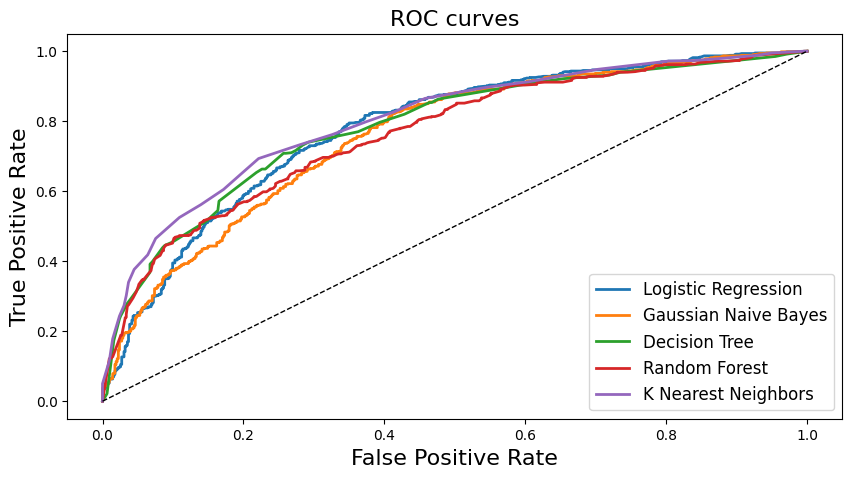

In [187]:
# create ROC chart
models = model_results_df['model'].unique()
colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple','tab:gray']

plt.figure(figsize=(10,5))

# ROC curve
for model, color in zip(models, colors):
  plt.plot( model_results[model]['FP_rate'] ,model_results[model]['TP_rate'], linewidth=2, color=color )
plt.legend(['Logistic Regression', 'Gaussian Naive Bayes', 'Decision Tree', 'Random Forest', 'K Nearest Neighbors', 'Support Vector Machine'], fontsize=12)

# Random chances line
plt.plot([0,1], ls='--', linewidth=1, color='black')

# set lable
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)

# title
plt.title('ROC curves', fontsize=16)

plt.plot()

In [188]:
model_results_df.to_csv('model_results.csv', index=False)

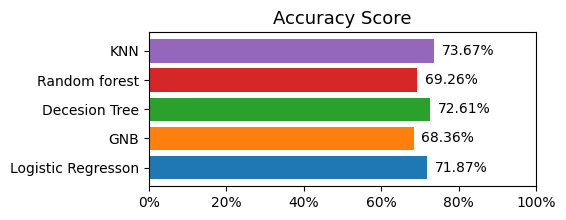

In [189]:
# compare accuracy chart
plt.figure(figsize=(5, 2))
bars = plt.barh(model_results_df['model'], model_results_df['Accuracy Score'], color=colors)

# add % accuracy
for bar, acc_score in zip(bars, model_results_df['Accuracy Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{acc_score*100:.2f}%', va='center')

plt.title('Accuracy Score', fontsize=13)

# set ticks
plt.xlim(0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()

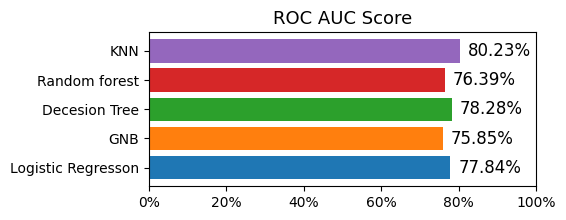

In [190]:
# compare AUC chart
plt.figure(figsize=(5, 2))
bars = plt.barh(model_results_df['model'], model_results_df['ROC AUC Score'], color=colors)

# add % AUC
for bar, auc_score in zip(bars, model_results_df['ROC AUC Score']):
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height() / 2, f'{auc_score*100:.2f}%', va='center', fontsize=12)

plt.title('ROC AUC Score', fontsize=13)

# set ticks
plt.xlim(0, 1)
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])

plt.show()